In [1]:
# Imports
%config InlineBackend.figure_format = 'retina'
%pylab inline
import sys
sys.path.append('../../src/')
from helpers import *
from plothelpers import *
from BayesianNamingGame import *

Populating the interactive namespace from numpy and matplotlib


# Convergence towards stable language

In [2]:
def run(init_counts=None, setup=None):
    if init_counts:
        setup['init_counts'] = init_counts
    res = BNG_simulation(**setup)
    vs = res['counts'] + setup['alpha']
    ps = vs / vs.sum(axis=1)[:, np.newaxis]
    return ps, res['counts']

def show_simulation(G, y, setup, titles=False):
    ax1 = subplot(G[y,0])
    setup['T'] = 10
    ps, counts = run(setup=setup)
    imshow(ps, interpolation='none', cmap=cmap)
    if titles: title('$t = 10$')

    ax2 = subplot(G[y,1])
    setup['T'] = 90
    ps, counts = run(counts, setup=setup)
    imshow(ps, interpolation='none', cmap=cmap)
    if titles: title('$t = 100$')

    ax3 = subplot(G[y,2])
    setup['T'] = 900
    ps, counts = run(counts, setup=setup)
    imshow(ps, interpolation='none', cmap=cmap)
    if titles: title('$t = 1000$')

    ax4 = subplot(G[y,3])
    setup['T'] = 9000
    ps, counts = run(counts, setup=setup)
    imshow(ps, interpolation='none', cmap=cmap)
    if titles: title('$t = 10\; 000$')

    ax5 = subplot(G[y,4])
    setup['T'] = 90000
    ps, counts = run(counts, setup=setup)
    imshow(ps, interpolation='none', cmap=cmap)
    if titles: title('$t = 100\; 000$')
    
    ax6 = subplot(G[y,5])
    xs = arange(setup['K'])
    alpha = array(setup['alpha'])
    pyplot.bar(xs-.5, alpha/sum(alpha), facecolor='k', alpha=.3)
    pyplot.bar(xs-.5,ps.mean(axis=0))
    xlim(0,19.5)
    sns.despine(ax=ax6)
    if titles: title('Limiting dist.')
    
    return [ax1,ax2,ax3,ax4,ax5,ax6]

def plot_runs(setup):
    G = gridspec.GridSpec(4, 6)
    cmap = CustomCmap('white', 'orange')

    axes = []
    axes += show_simulation(G, 0, setup, titles=True)
    axes += show_simulation(G, 1, setup)
    axes += show_simulation(G, 2, setup)

    subplot(G[0,0]).set_ylabel('run 1\nagents')
    subplot(G[1,0]).set_ylabel('run 2\nagents')
    subplot(G[2,0]).set_ylabel('run 3\nagents')
    for x in range(6):
        subplot(G[2,x]).set_xlabel('words')

    restyle_title(*axes, y=1.2, label=False)
    for ax in axes:
        ax.set_yticks([])
        ax.set_xticks([])

NameError: name 'cmap' is not defined

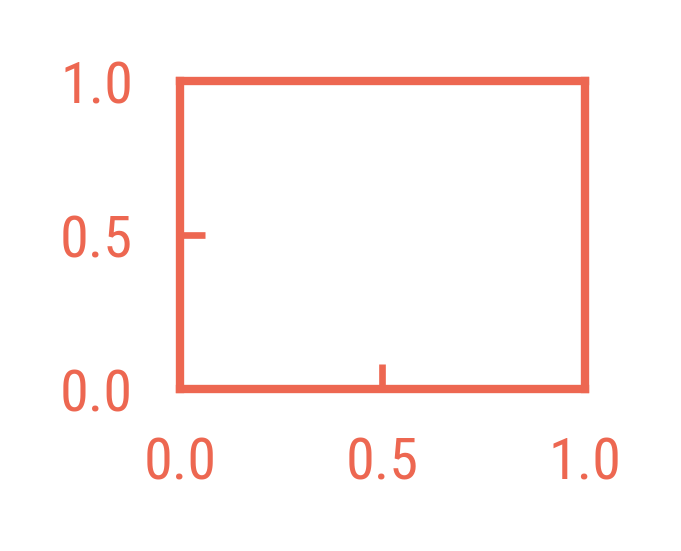

In [3]:
# Plot 
figure(figsize=cm2inch(12,6))
K=20
setup = dict(
    T = 5000, 
    num_datapoints = 100, 
    K = K, 
    N = 15,
    b = 1,
    alpha = K*get_pis(K)['peak'],
    record=False,
    record_utterances=False)

for gamma in [1,10000000]:
    for eta in [1,100]:
        for zeta in [1, 100]:
            setup['eta'] = eta
            setup['zeta'] = zeta
            setup['gamma'] = gamma
            plot_runs(setup)
            subplots_adjust(left=0, bottom=0, right=1, top=1, wspace=0.3)
            fn = f'FIG05-language-gamma-{gamma}-eta-{eta}-zeta-{zeta}'
            savefig(fn, dpi=450, bbox_inches='tight')

# Convergence over time

In [ ]:
def plot_utterances_over_time(setup):
    res = BNG_simulation(**setup)
    utter = res['utterances'].todense()
    words = res['utterances'].argmax(axis=1)

    dists = array([np.histogram(words[:t], bins=K, range=(0, K))[0] 
             for t in range(0,len(words),1)])
    dists = dists / dists.max(axis=1)[:, np.newaxis]

    # plot
    ax1 = subplot(121)
    points = utter.argmax(axis=1)
    plot(points, '.',color='#ed6751', ms=2)
    ylabel('word')
    xlabel('time ($t$)')
    xlim(0,5000)
    title('Words uttered at every interaction')
    gca().invert_yaxis()

    ax2 = subplot(122, sharey=ax1)
    alpha = array([setup['alpha']]) / setup['alpha'].max() 
    alpha = np.repeat(alpha, 200, axis=0)# * setup['K']*dists[-1].mean()

    ps = np.concatenate((dists, zeros((300,K)), alpha))
    imshow(ps.T, aspect=71, interpolation='none', cmap=cmap)
    xlabel('time ($t$)')
    title('Convergence of rel. freq. of words')
    xlim(-200, setup['T']+1000)
    ylim((-2, 41))
    sns.despine()
    restyle_title(ax1,ax2)
    
    ax2.annotate(r'$\alpha$', xy=(.96,.5), xytext=(1.05, .5), 
                 xycoords='axes fraction', fontsize = 7.5, 
                 ha='left', va='center',
                 arrowprops=dict(facecolor='black', width=.5, headlength=4, headwidth=3))
    

# figure(figsize=cm2inch(12,3))
# plot_utterances_over_time(setup)    
# subplots_adjust(left=0, bottom=0, right=1, top=1)

In [ ]:
# Plot 
K=40
setup = dict(
    T = 5000, 
    num_datapoints = 100, 
    K = K, 
    N = 15,
    b = 1,
    alpha = beta*get_pis(K)['peak'],
    record=False,
    record_utterances=True)

for gamma in [1,10000000]:
    for eta in [1,100]:
        for zeta in [1, 100]:
            setup['eta'] = eta
            setup['zeta'] = zeta
            setup['gamma'] = gamma
            figure(figsize=cm2inch(12,3))
            plot_utterances_over_time(setup)    
            subplots_adjust(left=0, bottom=0, right=1, top=1)
            fn = f'FIG05-utterances-gamma-{gamma}-eta-{eta}-zeta-{zeta}'
            savefig(fn, dpi=450, bbox_inches='tight')